## WEATHER ANALYSIS - EDA

### Introduction:
Weather data encompasses a wide range of information collected from various sources, including meteorological factors like Temperature, Precipitation, Humidity, Wind Speed and Direction, Atmospheric Pressure, Cloud Cover, UV Index giving us an invaluable window into the ever-changing world of atmospheric conditions.

### Components of the Analysis - Data Description:

#### Temporal Analysis: 
- We initiate our exploration by examining the temporal aspects of the dataset. This includes understanding the variations in temperature, humidity, and other variables across different months, days, and hours. Through time-based visualizations, we aim to identify seasonal patterns and trends.

#### Correlation Analysis: 
- Correlation matrices provide a powerful tool for uncovering relationships between different meteorological parameters. By assessing the correlations between variables such as temperature, humidity, and wind speed, we gain insights into how these factors interact and influence each other.

#### Wind Speed Distribution: 
- Wind speed is a critical component of weather analysis. We investigate the distribution of wind speeds to identify prevailing conditions. Histograms and line plots are employed to visualize the frequency and trends of wind speeds over the observed period.

#### Weather Condition Categorization: 
- Categorizing weather conditions allows us to explore the prevalence of different atmospheric states, such as clear skies, snow, or fog. This analysis aids in understanding the frequency and duration of specific weather phenomena.

### Data Description:
  - Date/Time: Date and Time of the recoreded weather data.
  - Temp_C: Temperature in Degree Celcius(C).
  - Dew Point Temp_C: Dew point temperature in degree Celcius.
  - Rel Hum_%: Relative humidity percentage.
  - Wind Speed_km/h: Wind Speed in kilometers per hour.
  - Visibility_km: Visibility in kilometers.
  - Press_kPa: Atmospheric pressure in kilopascals.
  - Weather: Weather conditions or description.

### Objective: 

The primary objective is to uncover patterns, trends, and relationships within the weather data. By employing statistical and visual analysis techniques, we aim to extract meaningful insights that contribute to a deeper understanding of the atmospheric conditions during the observed period.

### The Work Flow:
-Import Libraries
- Load the data
- Data Processing
- Exploratory Data Analysis (EDA)
- Data Visualization and interpretation
- Summary Statistics
- Time Series Analysis
- Key Findings and Recommendations
- Conclusions

### Import Python Libraries :

In [1]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline


### Loading the dataset

In [3]:
df = pd.read_csv("C:\\Users\\T\Desktop\\PROJECT FILES\\Alfido Tech\\Weather Data.csv")
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


### Data Processing

In [7]:
# Data inspection
df.shape

(8784, 8)

In [8]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


### OBSERVATIONS:
- There are 8784 rows and 8 columns in the data
- And there are no missing values

In [9]:
# checking for missing values
df.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [17]:
# Renaming columns for consistency

df.rename(columns={'Rel Hum_%': 'Humidity', 'Weather': 'Weather_condition'}, inplace=True)

In [18]:
df.describe()

,Temp_C,Dew Point Temp_C,Humidity,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [19]:
df.tail(5)

,Date/Time,Temp_C,Dew Point Temp_C,Humidity,Wind Speed_km/h,Visibility_km,Press_kPa,Weather_condition
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow
8783,2012-12-31 23:00:00,0.0,-2.1,86,30,11.3,99.89,Snow


In [5]:
# convert Date/Time column to Datetime datatype
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df.tail(5)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow
8783,2012-12-31 23:00:00,0.0,-2.1,86,30,11.3,99.89,Snow


## EXPLORATORY DATA ANALYSIS - EDA

In [23]:
# Data Exploration

print("\nNumber of unique values in each column:")
print(df.nunique())
print("\nUnique weather conditions:")
print(df['Weather_condition'].unique())


Number of unique values in each column:
Date/Time            8784
Temp_C                533
Dew Point Temp_C      489
Humidity               83
Wind Speed_km/h        34
Visibility_km          24
Press_kPa             518
Weather_condition      50
dtype: int64

Unique weather conditions:
['Fog' 'Freezing Drizzle,Fog' 'Mostly Cloudy' 'Cloudy' 'Rain'
 'Rain Showers' 'Mainly Clear' 'Snow Showers' 'Snow' 'Clear'
 'Freezing Rain,Fog' 'Freezing Rain' 'Freezing Drizzle' 'Rain,Snow'
 'Moderate Snow' 'Freezing Drizzle,Snow' 'Freezing Rain,Snow Grains'
 'Snow,Blowing Snow' 'Freezing Fog' 'Haze' 'Rain,Fog' 'Drizzle,Fog'
 'Drizzle' 'Freezing Drizzle,Haze' 'Freezing Rain,Haze' 'Snow,Haze'
 'Snow,Fog' 'Snow,Ice Pellets' 'Rain,Haze' 'Thunderstorms,Rain'
 'Thunderstorms,Rain Showers' 'Thunderstorms,Heavy Rain Showers'
 'Thunderstorms,Rain Showers,Fog' 'Thunderstorms' 'Thunderstorms,Rain,Fog'
 'Thunderstorms,Moderate Rain Showers,Fog' 'Rain Showers,Fog'
 'Rain Showers,Snow Showers' 'Snow Pellets' 'Rai

In [25]:
# Count of each weather condition
print("\nCount of each weather condition:")
print(df['Weather_condition'].value_counts())


Count of each weather condition:
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezi

In [26]:
categories = ['Clear','Cloudy','Snow','Rain','Drizzle','Fog','Thunderstorms','Haze']

df.replace(to_replace='Mainly Clear',value='Clear',inplace=True)
df.replace(to_replace='Mostly Cloudy',value='Cloudy',inplace=True)
df.replace(to_replace=['Snow Showers','Snow,Blowing Snow','Rain,Snow','Freezing Drizzle,Snow','Freezing Rain,Snow Grains','Snow,Ice Pellets','Moderate Snow','Rain,Snow,Ice Pellets','Drizzle,Snow','Rain Showers,Snow Showers','Moderate Snow,Blowing Snow','Snow Pellets','Rain,Snow Grains'],value='Snow',inplace=True)
df.replace(to_replace=['Rain Showers','Freezing Rain','Rain,Ice Pellets'],value='Rain',inplace=True)
df.replace(to_replace='Freezing Drizzle',value='Drizzle',inplace=True)
df.replace(to_replace=['Rain,Fog','Drizzle,Fog','Snow,Fog','Drizzle,Snow,Fog','Freezing Drizzle,Fog','Freezing Fog','Snow Showers,Fog','Freezing Rain,Fog','Thunderstorms,Rain Showers,Fog','Rain Showers,Fog','Thunderstorms,Moderate Rain Showers,Fog','Rain,Snow,Fog','Moderate Rain,Fog','Freezing Rain,Ice Pellets,Fog','Drizzle,Ice Pellets,Fog','Thunderstorms,Rain,Fog'],value='Fog',inplace=True)
df.replace(to_replace=['Thunderstorms,Rain Showers','Thunderstorms,Rain','Thunderstorms,Heavy Rain Showers'],value='Thunderstorms',inplace=True)
df.replace(to_replace=['Snow,Haze','Rain,Haze','Freezing Drizzle,Haze','Freezing Rain,Haze',],value='Haze',inplace=True)

In [28]:
df.Weather_condition.value_counts()

Cloudy           3797
Clear            3432
Snow              521
Rain              509
Fog               426
Drizzle            48
Haze               29
Thunderstorms      22
Name: Weather_condition, dtype: int64

- After cleaning and ensuring the quality of data, we drive into EDA to gain deeper understanding of the dataset; the characteristics, patterns and relationships.

## DATA VISUALIZATION

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style= "whitegrid")

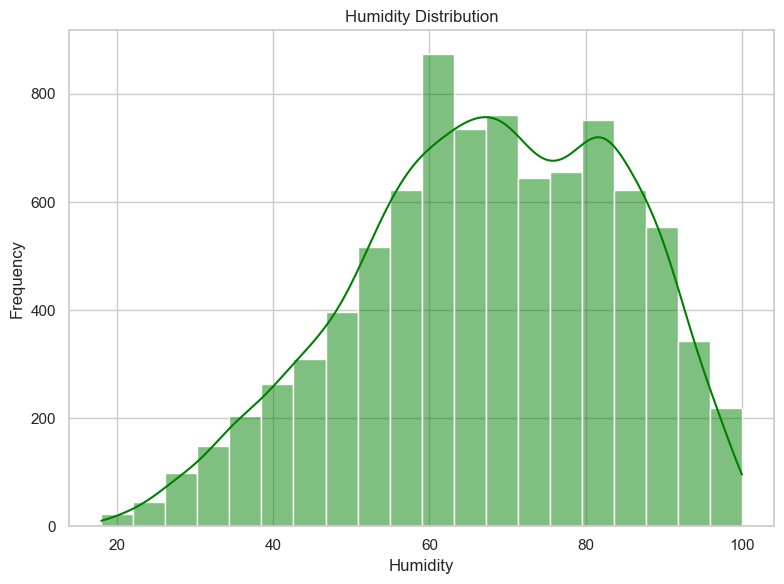

In [33]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Humidity'], bins=20, color='green', kde=True)
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.title('Humidity Distribution')
plt.tight_layout()
plt.show()

### Interpretation
- Less common occurrences of extremely low humidity levels around 20. suggesting drier conditions.
- Frequent Observations of higher humidity conditions.

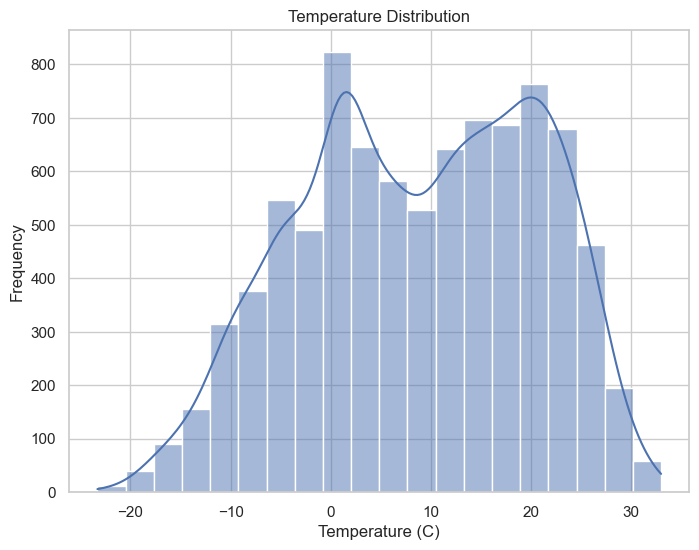

In [35]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='Temp_C', bins=20, kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (C)')
plt.ylabel('Frequency')
plt.show()

### Interpretation:
- Rare Occurencce of Extreme cold temperature.
- Moderate Temperature

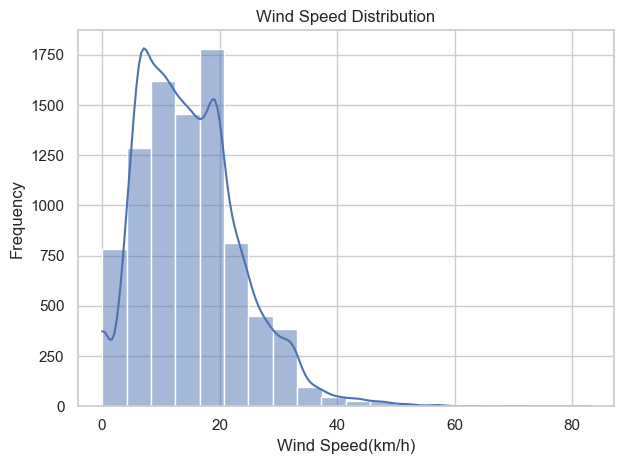

In [40]:
plt.subplot(1, 1, 1)
sns.histplot(data=df, x='Wind Speed_km/h', bins=20, kde=True)
plt.xlabel('Wind Speed(km/h)')
plt.ylabel('Frequency')
plt.title('Wind Speed Distribution')
plt.tight_layout()
plt.show()

### Interpretation
- As wind Speed reaches around 60 km/h frequency dropping to zero, indicates no or less occurrences of very high wind speeds.
- Chart shows a significant peak with the highest frequency of 1,1750 observations at low wind speeds.

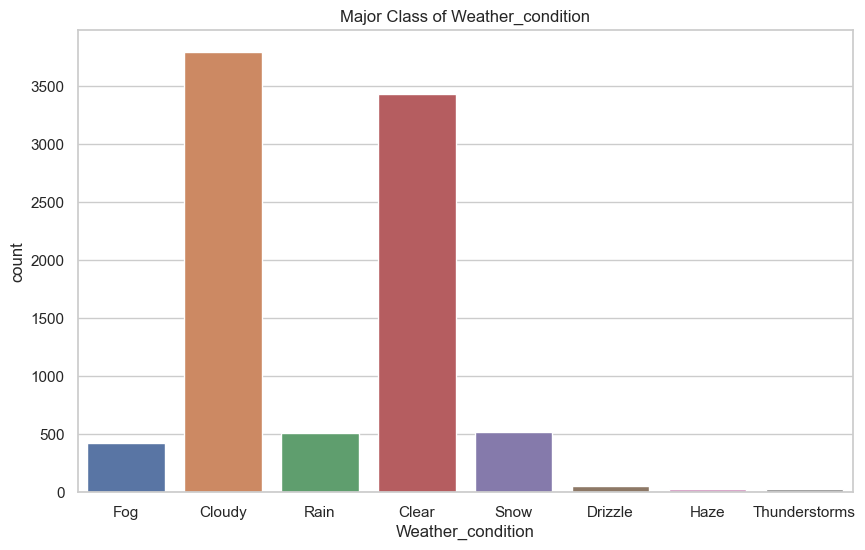

In [47]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Weather_condition')
plt.title('Major Class of Weather_condition')
plt.show()

### Interpretation:
- This is clearly an imbalanced dataset with 'Cloudy' and 'Clear' being the majority classes and the remaining ones being the minority classes.

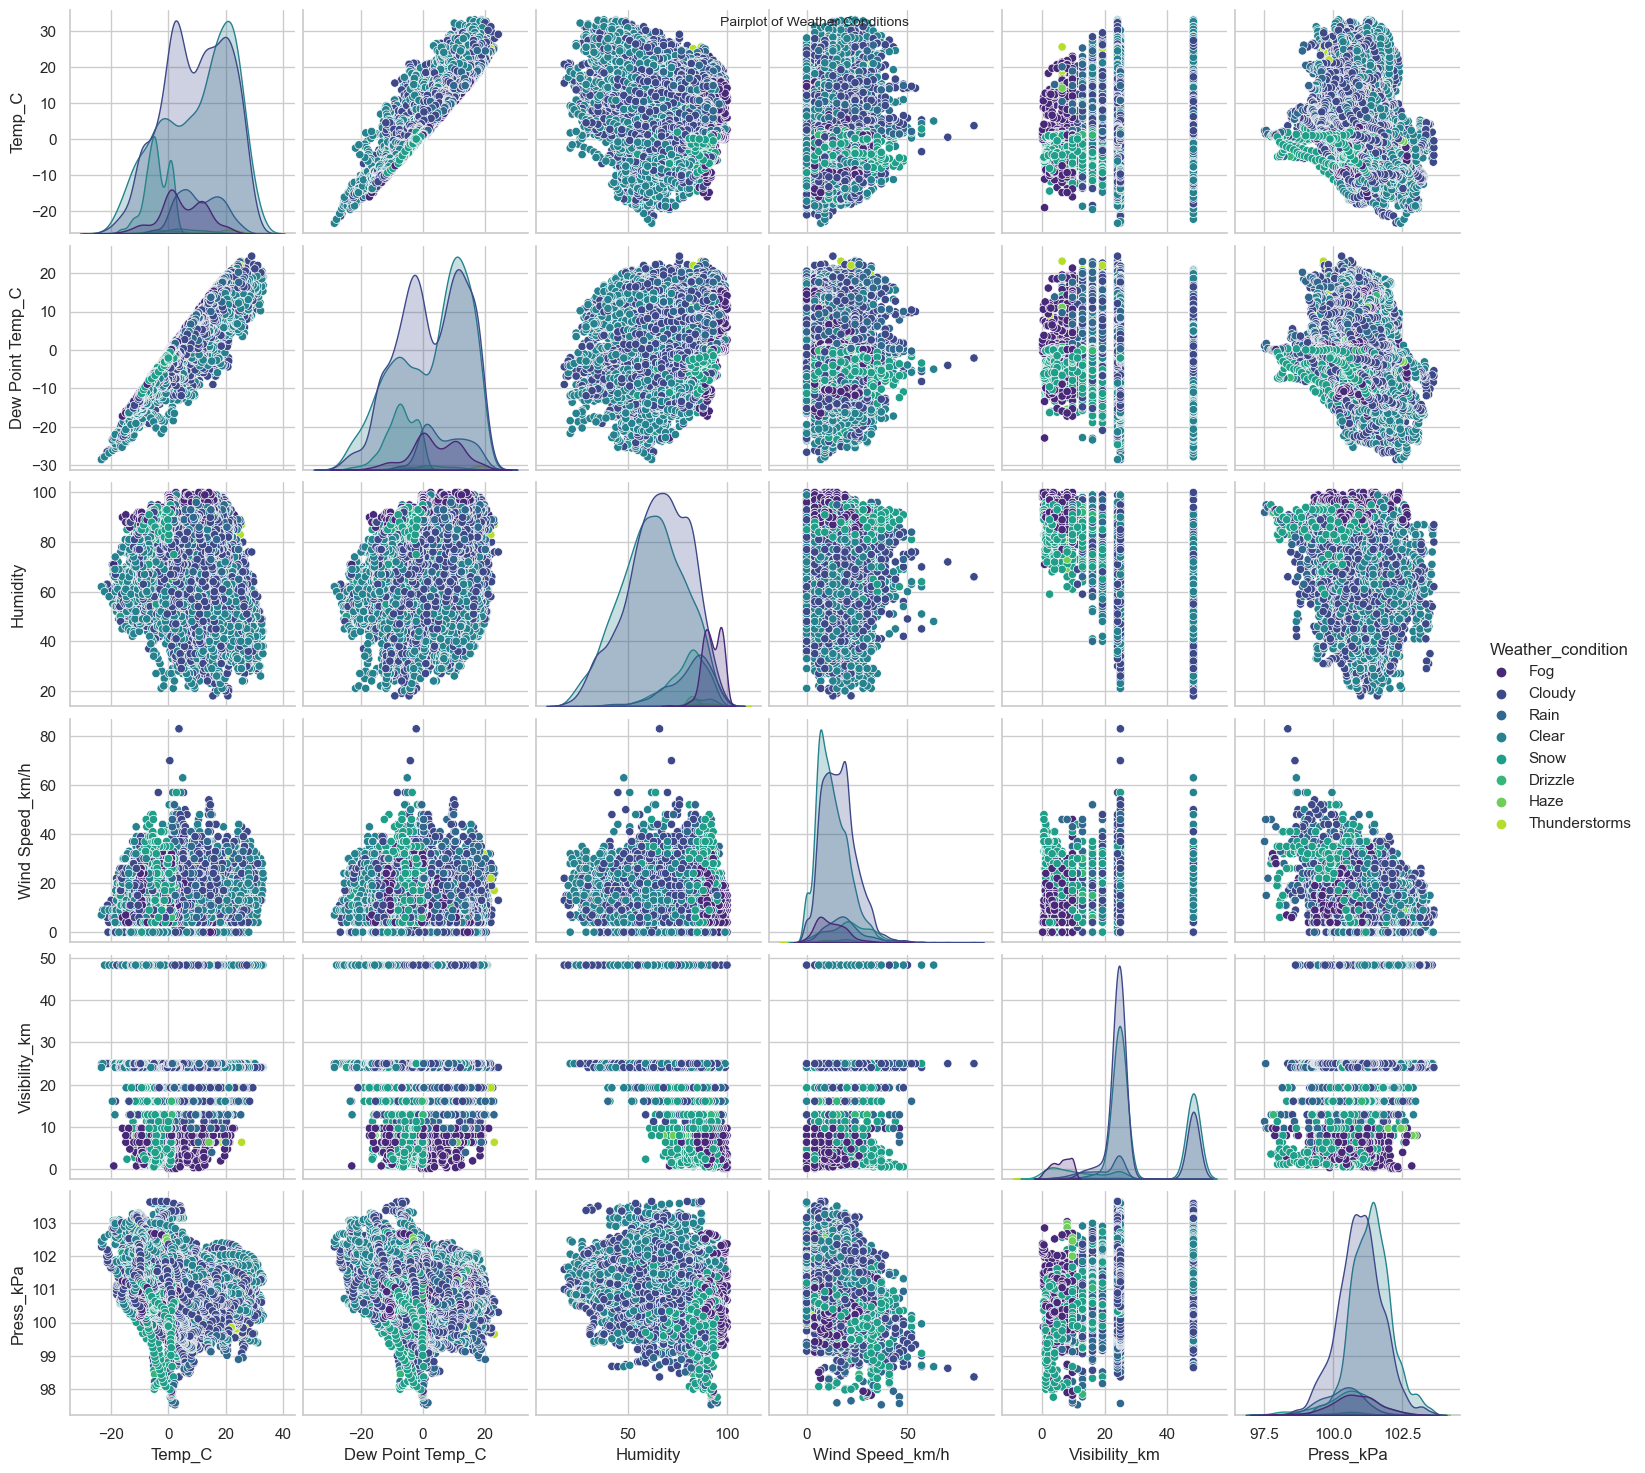

In [51]:
fig = sns.pairplot(df, hue='Weather_condition', palette='viridis')
plt.suptitle('Pairplot of Weather Conditions', fontsize=10)
plt.show()

The pairplot shows the relationships between numerical variables in the dataset, with 'Weather_condition' as the hue. We can observe that there is a strong correlation between temperature and apparent temperature, which indicates that they are measuring similar aspects of weather. Additionally, we can see that the distribution of humidity is relatively consistent across different weather conditions, while the distribution of wind speed is more variable.

When we look at the scatterplots for different weather conditions, we can see that there are some noticeable trends. For example, on days with clear weather, there is a positive correlation between temperature and apparent temperature, while on days with fog or haze, this relationship is weaker. We can also see that on days with thunderstorm or snow, wind speed tends to be higher compared to other weather conditions.

Overall, this pairplot provides insights into how different weather conditions impact the relationships and distributions of the numerical variables in the dataset. By analyzing these patterns and trends, we can gain a better understanding of how weather conditions affect different aspects of weather.her.

C:\Users\T\AppData\Local\Temp\ipykernel_9792\3568234905.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='rainbow', vmin=-1.0, vmax=1.0)


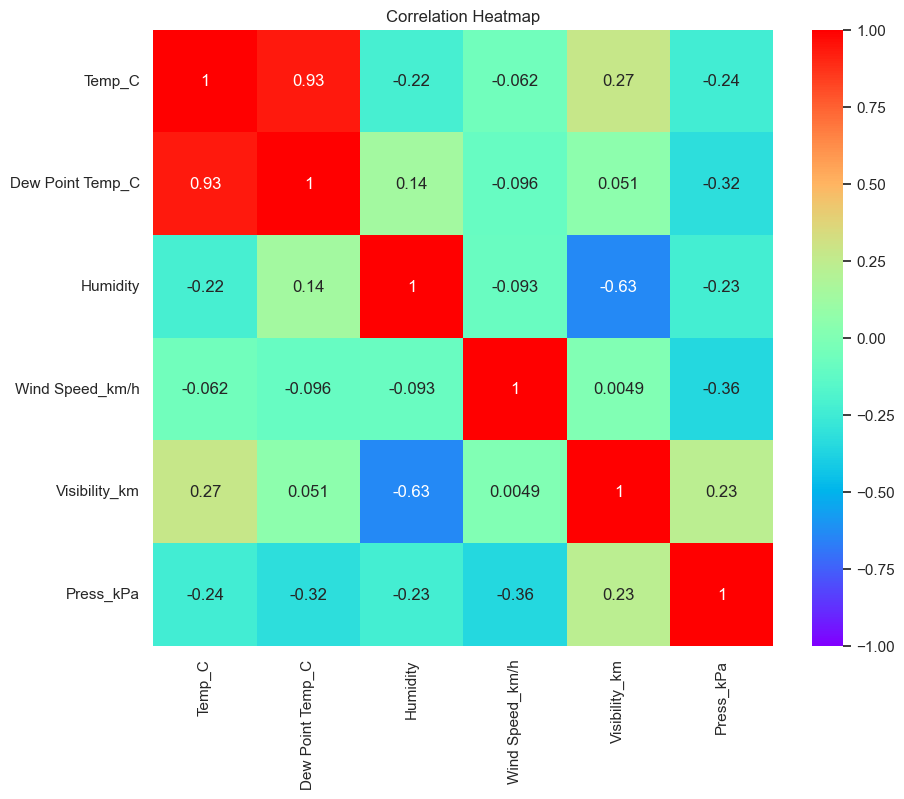

In [53]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='rainbow', vmin=-1.0, vmax=1.0)
plt.title('Correlation Heatmap')
plt.show()

### Interpretation:
- Matrix shows that there is positve correlation between temperature and dew point Temeperature.
- Other Correlations are weak or near - 0. 

## Summary Statistics:

In [55]:
numeric_df = df.select_dtypes(include=['number'])
summary_stats = numeric_df.describe()
print(summary_stats)

            Temp_C  Dew Point Temp_C     Humidity  Wind Speed_km/h  \
count  8784.000000       8784.000000  8784.000000      8784.000000   
mean      8.798144          2.555294    67.431694        14.945469   
std      11.687883         10.883072    16.918881         8.688696   
min     -23.300000        -28.500000    18.000000         0.000000   
25%       0.100000         -5.900000    56.000000         9.000000   
50%       9.300000          3.300000    68.000000        13.000000   
75%      18.800000         11.800000    81.000000        20.000000   
max      33.000000         24.400000   100.000000        83.000000   

       Visibility_km    Press_kPa  
count    8784.000000  8784.000000  
mean       27.664447   101.051623  
std        12.622688     0.844005  
min         0.200000    97.520000  
25%        24.100000   100.560000  
50%        25.000000   101.070000  
75%        25.000000   101.590000  
max        48.300000   103.650000  


### Interpretation:
- Temperature (Temp_C): Mean temperature -8 80'C Range -23 30'C to 33.00:C 
- Dew Point Temperature (Dew Point Temp_C). Mean dew point temperature: -2.56°C Range -28 50:C to 24 40:C 
- Relative Humidity (Rel Hum_%). Mean relative humidity -67 43% Range- 18% to 100% 
- Wind Speed (Wind Speed_km/h) Mean wind speed. -14 95 km/h Range: 0 km/h to 83 krnli 
- Visibility (Visibility_km) Mean visibility -27 66 km Range 0.20 km to 48 30 km 
- Pressure (Press_kPa) Mean pressure -101 05 kPa Range! 97.52 kPa to 103.65 kPa

## Time-Based Analysis:

In [61]:
# Convert 'Date/Time' column to datetime format

df['Date/Time'] = pd.to_datetime(df['Date/Time'])

In [62]:
# Extract and create new columns for Year, Month, Day, and Hour

df['Year'] = df['Date/Time'].dt.year
df['Month'] = df['Date/Time'].dt.month
df['Day'] = df['Date/Time'].dt.day
df['Hour'] = df['Date/Time'].dt.hour

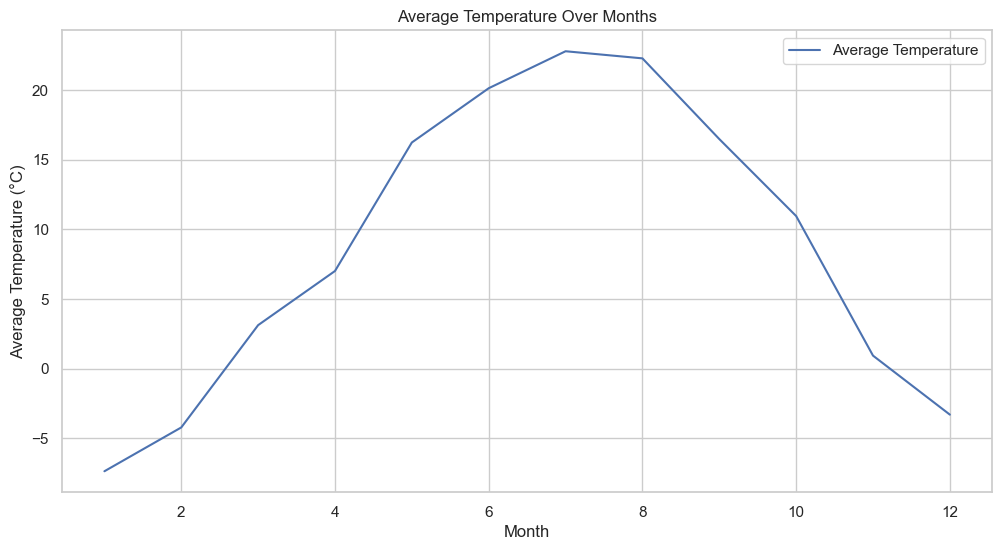

In [70]:
# Plot average temperature over months

plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Temp_C', data=df.groupby('Month')['Temp_C'].mean().reset_index(), label='Average Temperature')
plt.title('Average Temperature Over Months')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.show()

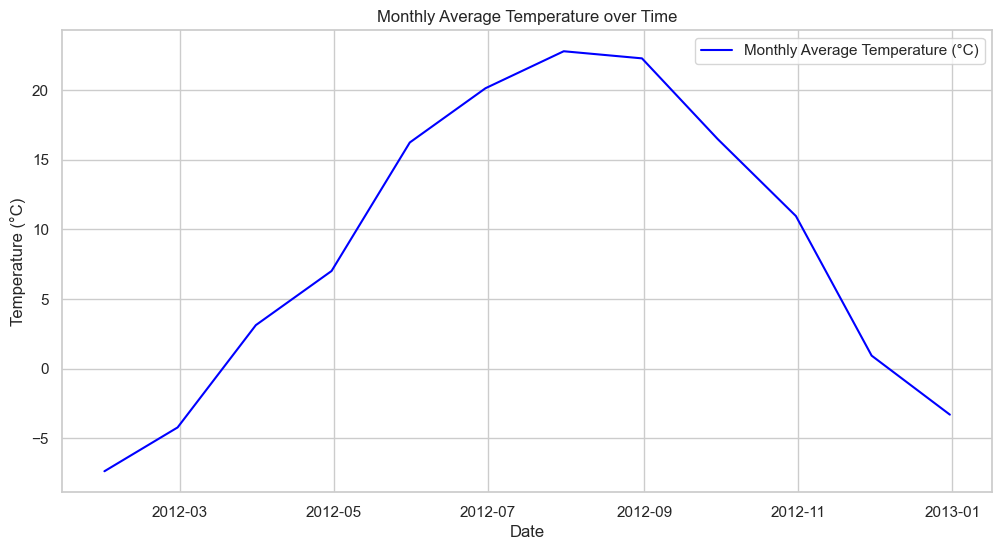

In [11]:
monthly_average = df['Temp_C'].resample('M').mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_average.index, monthly_average, label='Monthly Average Temperature (°C)', color='blue')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Monthly Average Temperature over Time')
plt.legend()
plt.show()

### Interpretation: 
- High Temperature during the late summer months(August and September)
- Low Temperatures in winter periods.

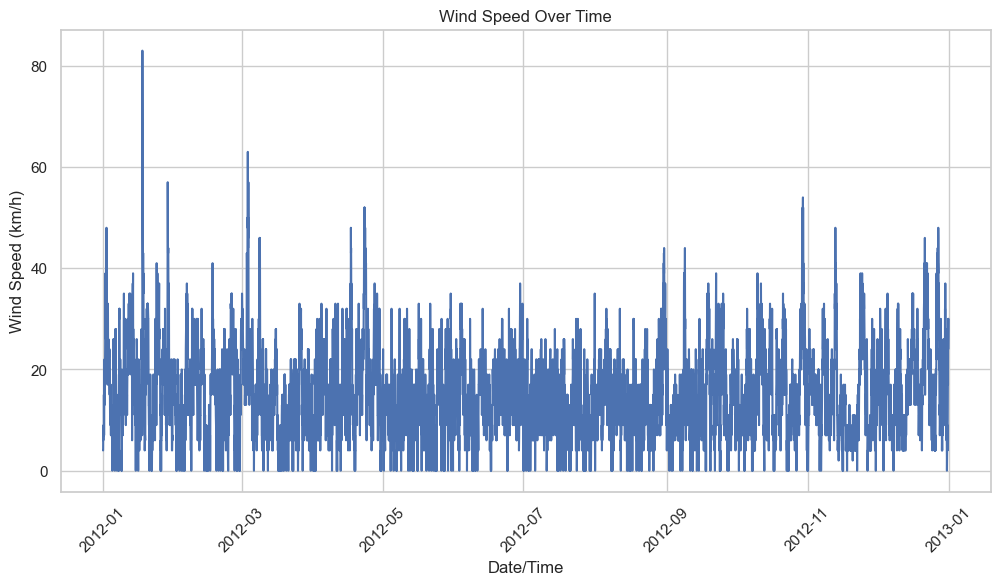

In [71]:
# Plot wind speed over time

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date/Time', y='Wind Speed_km/h', data=df)
plt.title('Wind Speed Over Time')
plt.xlabel('Date/Time')
plt.ylabel('Wind Speed (km/h)')
plt.xticks(rotation=45)
plt.show()

### Interpretation:
- The line plot of wind speed over time can reveal trends or patterns in wind behavior. Sudden spikes in wind speed indicate storms or turbulent weather periods

## Findings: 
### Temperature Distribution 
- The dataset includes a wide range of temperature values, with minimum temperatures as low as -23 3'C and maximum temperature reaching 33'C 
- Most of the temperature data falls between O'C and 20'C 
- There are rare occurrences of extremely cold temperatures below -20°C and frequent moderate temperatures around O'C and above 

### Humidity Distribution 
- Humidity levels range from around 20 to above 80. 
- Most data points are clustered around the higher humidity levels (above 80). indicating that higher humidity is more common in the dataset 

### Wind Speed Distribution 
- Wind speeds in the dataset vary widely with a maximum speed of 83 km/h 
- The distribution shows that most wind speeds are relatively low below 20 km/h but there are occasional spikes to very high wind speeds (up to 83 km/h) 

### Temperature Box Plot 
- The box plot for temperature (Temp_C) shows that temperatures typically range between 0°C and 20'C 
- There are some outliers present in tne data represented as individual data points outside the whiskers of the box 

### Scatter Plot (Temperature vs Relative Humidity) 
- The scatter plot suggests that Inere is no strong linear relationship between temperature ana ielative humidity 
- Data points are scattered without a clear pattern indicating that temperature and humidity are not highly correlated 

### Correlation Matrix 
- The correlation matnx indicates the relationships between variables 
- Most variables have low to moderate correlations with each other Notably. Dew Point Temp_C and Temp_C have a high positive correlation (0.93), while Ref Hum_% and Visibility_km have a strong negative correlation (-0.63).

## Recommendations
- Given the wide temperature range in the dataset, it's essential to be prepared for extreme temperatures. Implement measures to handle very low temperatures below -20°C and very high temperatures above 20°C, which are rare but can be critical.
- Given the observed seasonal temperature trends, make preparations for the months of August to September, where temperatures tend to be higher, and for January and March when temperatures are lower.

  
## Conclusion
- Analysis on Weather Data is an essential process for extracting insights from historical weather data. This analysis explored a comprehensive dataset, revealing temperature variations, humidity levels, wind speed patterns, and correlations. The data depicted a wide temperature range and frequent high humidity. There was no strong linear relationship between temperature and humidity. Correlations between variables varied. Weather Data Analysis provides valuable information for climate modeling, forecasting, and decision-making across various sectors. It empowers decision-makers to better prepare Activate Windows for and respond to different weather conditions, making it a vital tool in addressing weather-related challenges. 